In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from flask import Flask
import pickle

In [166]:
df=pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/shonjeeyeon/DG_Week_4/main/drug200.csv'))
print(df.tail())

print(df.isna().any())
print(df.describe())
print(df.shape)
print(df.info())

     Age Sex      BP Cholesterol  Na_to_K   Drug
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX
Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000
(200, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP          

In [167]:
#Organize drug name in 'Drug Name' forms

df=df.replace(['DrugY','drugA','drugB','drugC','drugX'], ['Drug Y','Drug A', 'Drug B', 'Drug C','Drug X'])
print(df)

     Age Sex      BP Cholesterol  Na_to_K    Drug
0     23   F    HIGH        HIGH   25.355  Drug Y
1     47   M     LOW        HIGH   13.093  Drug C
2     47   M     LOW        HIGH   10.114  Drug C
3     28   F  NORMAL        HIGH    7.798  Drug X
4     61   F     LOW        HIGH   18.043  Drug Y
..   ...  ..     ...         ...      ...     ...
195   56   F     LOW        HIGH   11.567  Drug C
196   16   M     LOW        HIGH   12.006  Drug C
197   52   M  NORMAL        HIGH    9.894  Drug X
198   23   M  NORMAL      NORMAL   14.020  Drug X
199   40   F     LOW      NORMAL   11.349  Drug X

[200 rows x 6 columns]


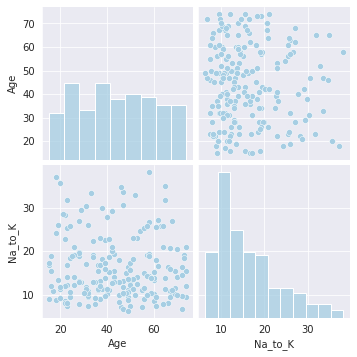

              Age   Na_to_K
Age      1.000000 -0.063119
Na_to_K -0.063119  1.000000


In [168]:
#EDA (pairplots)

sns.pairplot(data=df)
plt.show()

print(df.corr())

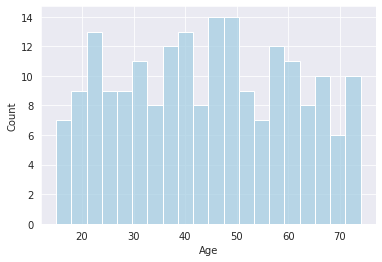

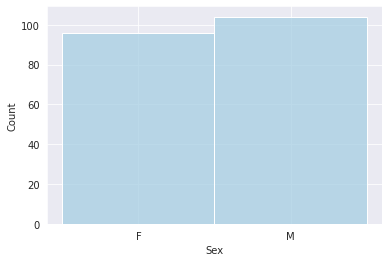

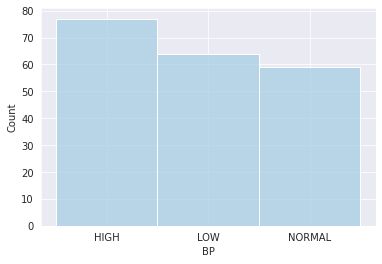

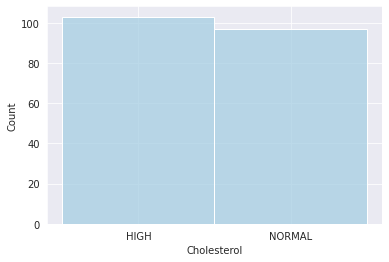

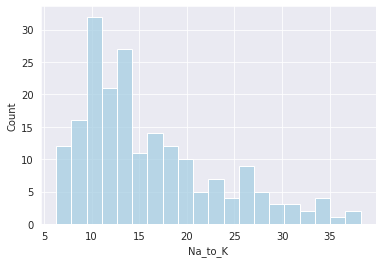

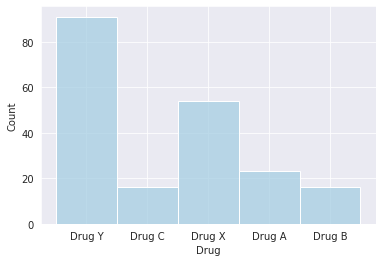

In [169]:
#EDA (Histograms)
cols=df.columns
for i in cols:
  ax=sns.histplot(data=df[i], bins=20)
  plt.show()

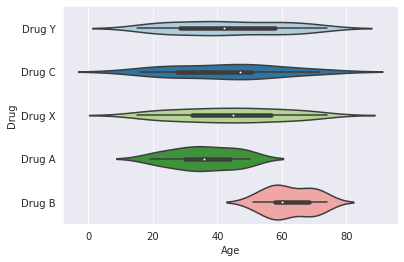

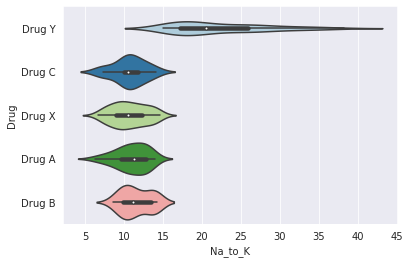

In [170]:
#EDA (violinplots)

ax1=sns.violinplot(data=df, x='Age', y='Drug')
plt.show()
ax2=sns.violinplot(data=df,x='Na_to_K', y='Drug')
plt.show()

In [171]:
#Label encoding for categorical variables
df['Sex']= LabelEncoder().fit_transform(df['Sex'])
df['BP']= LabelEncoder().fit_transform(df['BP'])
df['Cholesterol']= LabelEncoder().fit_transform(df['Cholesterol'])

#df['Drug']= LabelEncoder().fit_transform(df['Drug'])


In [172]:
#Separate X and y

y=pd.DataFrame(df['Drug'])
print(y.head())

X=df.drop('Drug',axis=1)
print(X.head())

     Drug
0  Drug Y
1  Drug C
2  Drug C
3  Drug X
4  Drug Y
   Age  Sex  BP  Cholesterol  Na_to_K
0   23    0   0            0   25.355
1   47    1   1            0   13.093
2   47    1   1            0   10.114
3   28    0   2            0    7.798
4   61    0   1            0   18.043


In [173]:
df1=pd.concat([X,y],axis=1)
df1.corr()

,Age,Sex,BP,Cholesterol,Na_to_K
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000


In [174]:
#Split train vs test data

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.25,
                                    random_state=0, stratify=y)

In [175]:
# Run a GridSearch to find best params

#rf = RandomForestClassifier(random_state = 42)
#param_grid = { 
#    'n_estimators': [250, 500, 1000],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : [4,5,6,7,8],
#    'criterion' : ['gini','entropy', 'log loss']
#}

#grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
#grid.fit(X_train, y_train)
#print(grid.best_params_)

In [176]:
#Run RF using the best parameters found from the above search
rf=RandomForestClassifier(n_estimators=250, max_features='auto', max_depth=5, random_state=42, class_weight='balanced', criterion='gini')
rf.fit(X_train, y_train)

cv=RepeatedStratifiedKFold()
accuracy=cross_val_score(rf,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('Accuracy:', np.mean(accuracy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.9885


In [177]:
with open('model.pkl', 'wb') as files:
    pickle.dump(rf, files)

In [178]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[56, 0, 1, 0, 11.349]]))

['Drug C']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
